In [134]:
import json
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [135]:
PIT_PATH       = '../data/PIT'
RAW_LLAMA_PATH = '../data/PIT-RAQ-Drive/raw'

df_other_train_docs = pl.read_ndjson(f'{PIT_PATH}/wiki2023_other_train/doc.jsonl')
df_other_train_docs.head() 

wiki_id,title,text
i64,str,str
73036767,"""Star Awards 2023""","""The 28th Edition of Star Award…"
71879517,"""50th Annie Awards""","""The 50th ceremony of the Annie…"
74323593,"""3rd Hollywood Creative Allianc…","""The 3rd Hollywood Creative All…"
72740801,"""2023 Summer Metro Manila Film …","""The 2023 Summer Metro Manila F…"
72914374,"""76th Tony Awards""","""The 76th Tony Awards recognize…"


In [136]:
PIT_RAQ_PATH = RAW_LLAMA_PATH

df_raq_other_train = pl.read_ndjson(f'{PIT_RAQ_PATH}/other_train_filter_relative_all.jsonl')
df_raq_other_train.head()

question,answer,path,wiki,llama_filter_relative,prompt
str,str,str,i64,str,str
"""What is the common year of rel…","""2023""","""llama_outputs/llama_out_other_…",73277730,"""YES""",""" Here is a question. Judge if …"
"""How many episodes of The Owl H…","""43""","""llama_outputs/llama_out_other_…",68226491,"""YES""",""" Here is a question. Judge if …"
"""What is the common location wh…","""Nice, France""","""llama_outputs/llama_out_other_…",73885868,"""YES""",""" Here is a question. Judge if …"
"""What is the common platform on…","""ZEE5""","""llama_outputs/llama_out_other_…",64209496,"""YES""",""" Here is a question. Judge if …"
"""What is the common reason for …","""COVID-19 pandemic""","""llama_outputs/llama_out_other_…",63489175,"""YES""",""" Here is a question. Judge if …"


In [137]:
def apply_llama_filter_relative(df: pl.DataFrame, val: str = "YES") -> pl.DataFrame:
    initial_size = len(df)
    filtered_df  = df.filter(pl.col("llama_filter_relative") == val)
    print(f"Filtered {initial_size - len(filtered_df)} rows. New ratio: {len(filtered_df) / initial_size * 100:.02f}% of the original dataset size.")
    return filtered_df

dsets = [
    "other_train_filter_relative_all",
    "film_train_filter_relative_all",
    "film_test_filter_relative_all",
]

for dset in dsets:
    df = pl.read_ndjson(f'{PIT_RAQ_PATH}/{dset}.jsonl')
    df = apply_llama_filter_relative(df)
    # select only questions and answers
    df = df.select([
        "question",
        "answer",
    ])
    # export to jsonl
    df.write_ndjson(f'{PIT_RAQ_PATH}/{dset}_qa.jsonl')

Filtered 53330 rows. New ratio: 51.73% of the original dataset size.
Filtered 34186 rows. New ratio: 36.63% of the original dataset size.
Filtered 5348 rows. New ratio: 34.52% of the original dataset size.


In [139]:
import glob

npy_file_name_chunks = sorted([f for f in glob.glob(
    pathname="*.npy", root_dir=PIT_RAQ_PATH)])

npy_files = [f"{PIT_RAQ_PATH}/{f}" for f in npy_file_name_chunks]
for f in npy_files:
    print(f)

../data/PIT-RAQ-Drive/raw/llama_out_film_test_0_256.npy
../data/PIT-RAQ-Drive/raw/llama_out_film_train_0_1000.npy
../data/PIT-RAQ-Drive/raw/llama_out_film_train_1000_1720.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_0_1000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_1000_2000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_2000_3000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_3000_4000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_4000_5000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_5000_6000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_6000_7000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_7000_8000.npy
../data/PIT-RAQ-Drive/raw/llama_out_other_train_8000_8675.npy
../data/PIT-RAQ-Drive/raw/llama_out_train_0_1000.npy
../data/PIT-RAQ-Drive/raw/llama_out_train_1000_2000.npy
../data/PIT-RAQ-Drive/raw/llama_out_train_2000_3000.npy
../data/PIT-RAQ-Drive/raw/llama_out_train_3000_4000.npy
../data/PIT-RAQ-Drive/raw/llama_out_train_4000_50

In [140]:
npy_data = [
    np.load(f, allow_pickle=True) for f in npy_files
]

npy_data_dict  = {f: d.item() for f, d in zip(npy_files, npy_data)}
first_key      = list(npy_data_dict.keys())[0]
first_data_key = list(npy_data_dict[first_key].keys())[0]

for chunk_key in npy_data_dict:
    for data_key in npy_data_dict[chunk_key]:
        row           = npy_data_dict[chunk_key][data_key]
        row["anchor"] = data_key

    # flatten the dict
    print(f"Flattening {chunk_key} of size {len(npy_data_dict[chunk_key])}")
    flat_chunk_dict          = list(npy_data_dict[chunk_key].values())
    npy_data_dict[chunk_key] = pl.DataFrame(flat_chunk_dict)

npy_data_dict[first_key].head()
total_size = sum([len(npy_data_dict[k]) for k in npy_data_dict])
print(f"Total size of all chunks: {total_size}")

Flattening ../data/PIT-RAQ-Drive/raw/llama_out_film_test_0_256.npy of size 256
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_film_train_0_1000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_film_train_1000_1720.npy of size 720
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_0_1000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_1000_2000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_2000_3000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_3000_4000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_4000_5000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_5000_6000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_6000_7000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_7000_8000.npy of size 1000
Flattening ../data/PIT-RAQ-Drive/raw/llama_out_other_train_8000_8675.n

In [126]:
import ast

def split_df_to_qa_columns(df: pl.DataFrame) -> pl.DataFrame:

    def parse_content(content):
        try:
            return json.loads(content)
        except json.JSONDecodeError:
            try:
                return ast.literal_eval(content)
            except (ValueError, SyntaxError):
                return {}

    def process_llama_output_str_question(val: dict) -> str:
        try:
            content = val["content"]
            qa      = parse_content(content)
            return qa.get("question", "")
        except KeyError:
            return ""

    def process_llama_output_str_answer(val: dict) -> str:
        try:
            content = val["content"]
            qa      = parse_content(content)
            return qa.get("answer", "")
        except KeyError:
            return ""

    result_df = df\
                .with_columns(
                    pl.col("llama_out")\
                        .map_elements(process_llama_output_str_question, return_dtype=str)\
                        .alias("question"),
                    pl.col("llama_out")\
                        .map_elements(process_llama_output_str_answer,   return_dtype=str)\
                        .alias("answer"))\
                .filter(pl.col("question") != "")\
                .filter(pl.col("answer") != "")
    
    return result_df

In [129]:
all_dfs        = {}
n_orig_samples = 0
n_proc_samples = 0
for chunk_key in npy_data_dict:
    print(f"Processing {chunk_key}...")
    n_orig_samples     += len(npy_data_dict[chunk_key])
    all_dfs[chunk_key] = split_df_to_qa_columns(npy_data_dict[chunk_key])
    n_proc_samples     += len(all_dfs[chunk_key])
    
print(f"Processed {n_proc_samples} samples.")
print(f"Lost a percentage of {(n_orig_samples - n_proc_samples) / n_orig_samples * 100:.02f}% of the original dataset size.")


Processing ../data/PIT-RAQ-Drive/llama_out_film_test_0_256.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_film_train_0_1000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_film_train_1000_1720.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_0_1000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_1000_2000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_2000_3000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_3000_4000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_4000_5000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_5000_6000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_6000_7000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_7000_8000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_other_train_8000_8675.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_train_0_1000.npy...
Processing ../data/PIT-RAQ-Drive/llama_out_train_1000_2000.npy...
Processing ../data/PI

In [132]:
# concatenate all the dataframes
concat_df = pl.concat([
    all_dfs[chunk_key]
    for chunk_key in all_dfs
])

# export to jsonl only the (prompt, question, answer) columns
concat_df = concat_df.select([
    "prompt",
    "question",
    "answer",
])
concat_df.write_ndjson("../data/PIT-RAQ-Drive/raq_all_qa.jsonl")

In [1]:
import seaborn as sns
import matplotlib

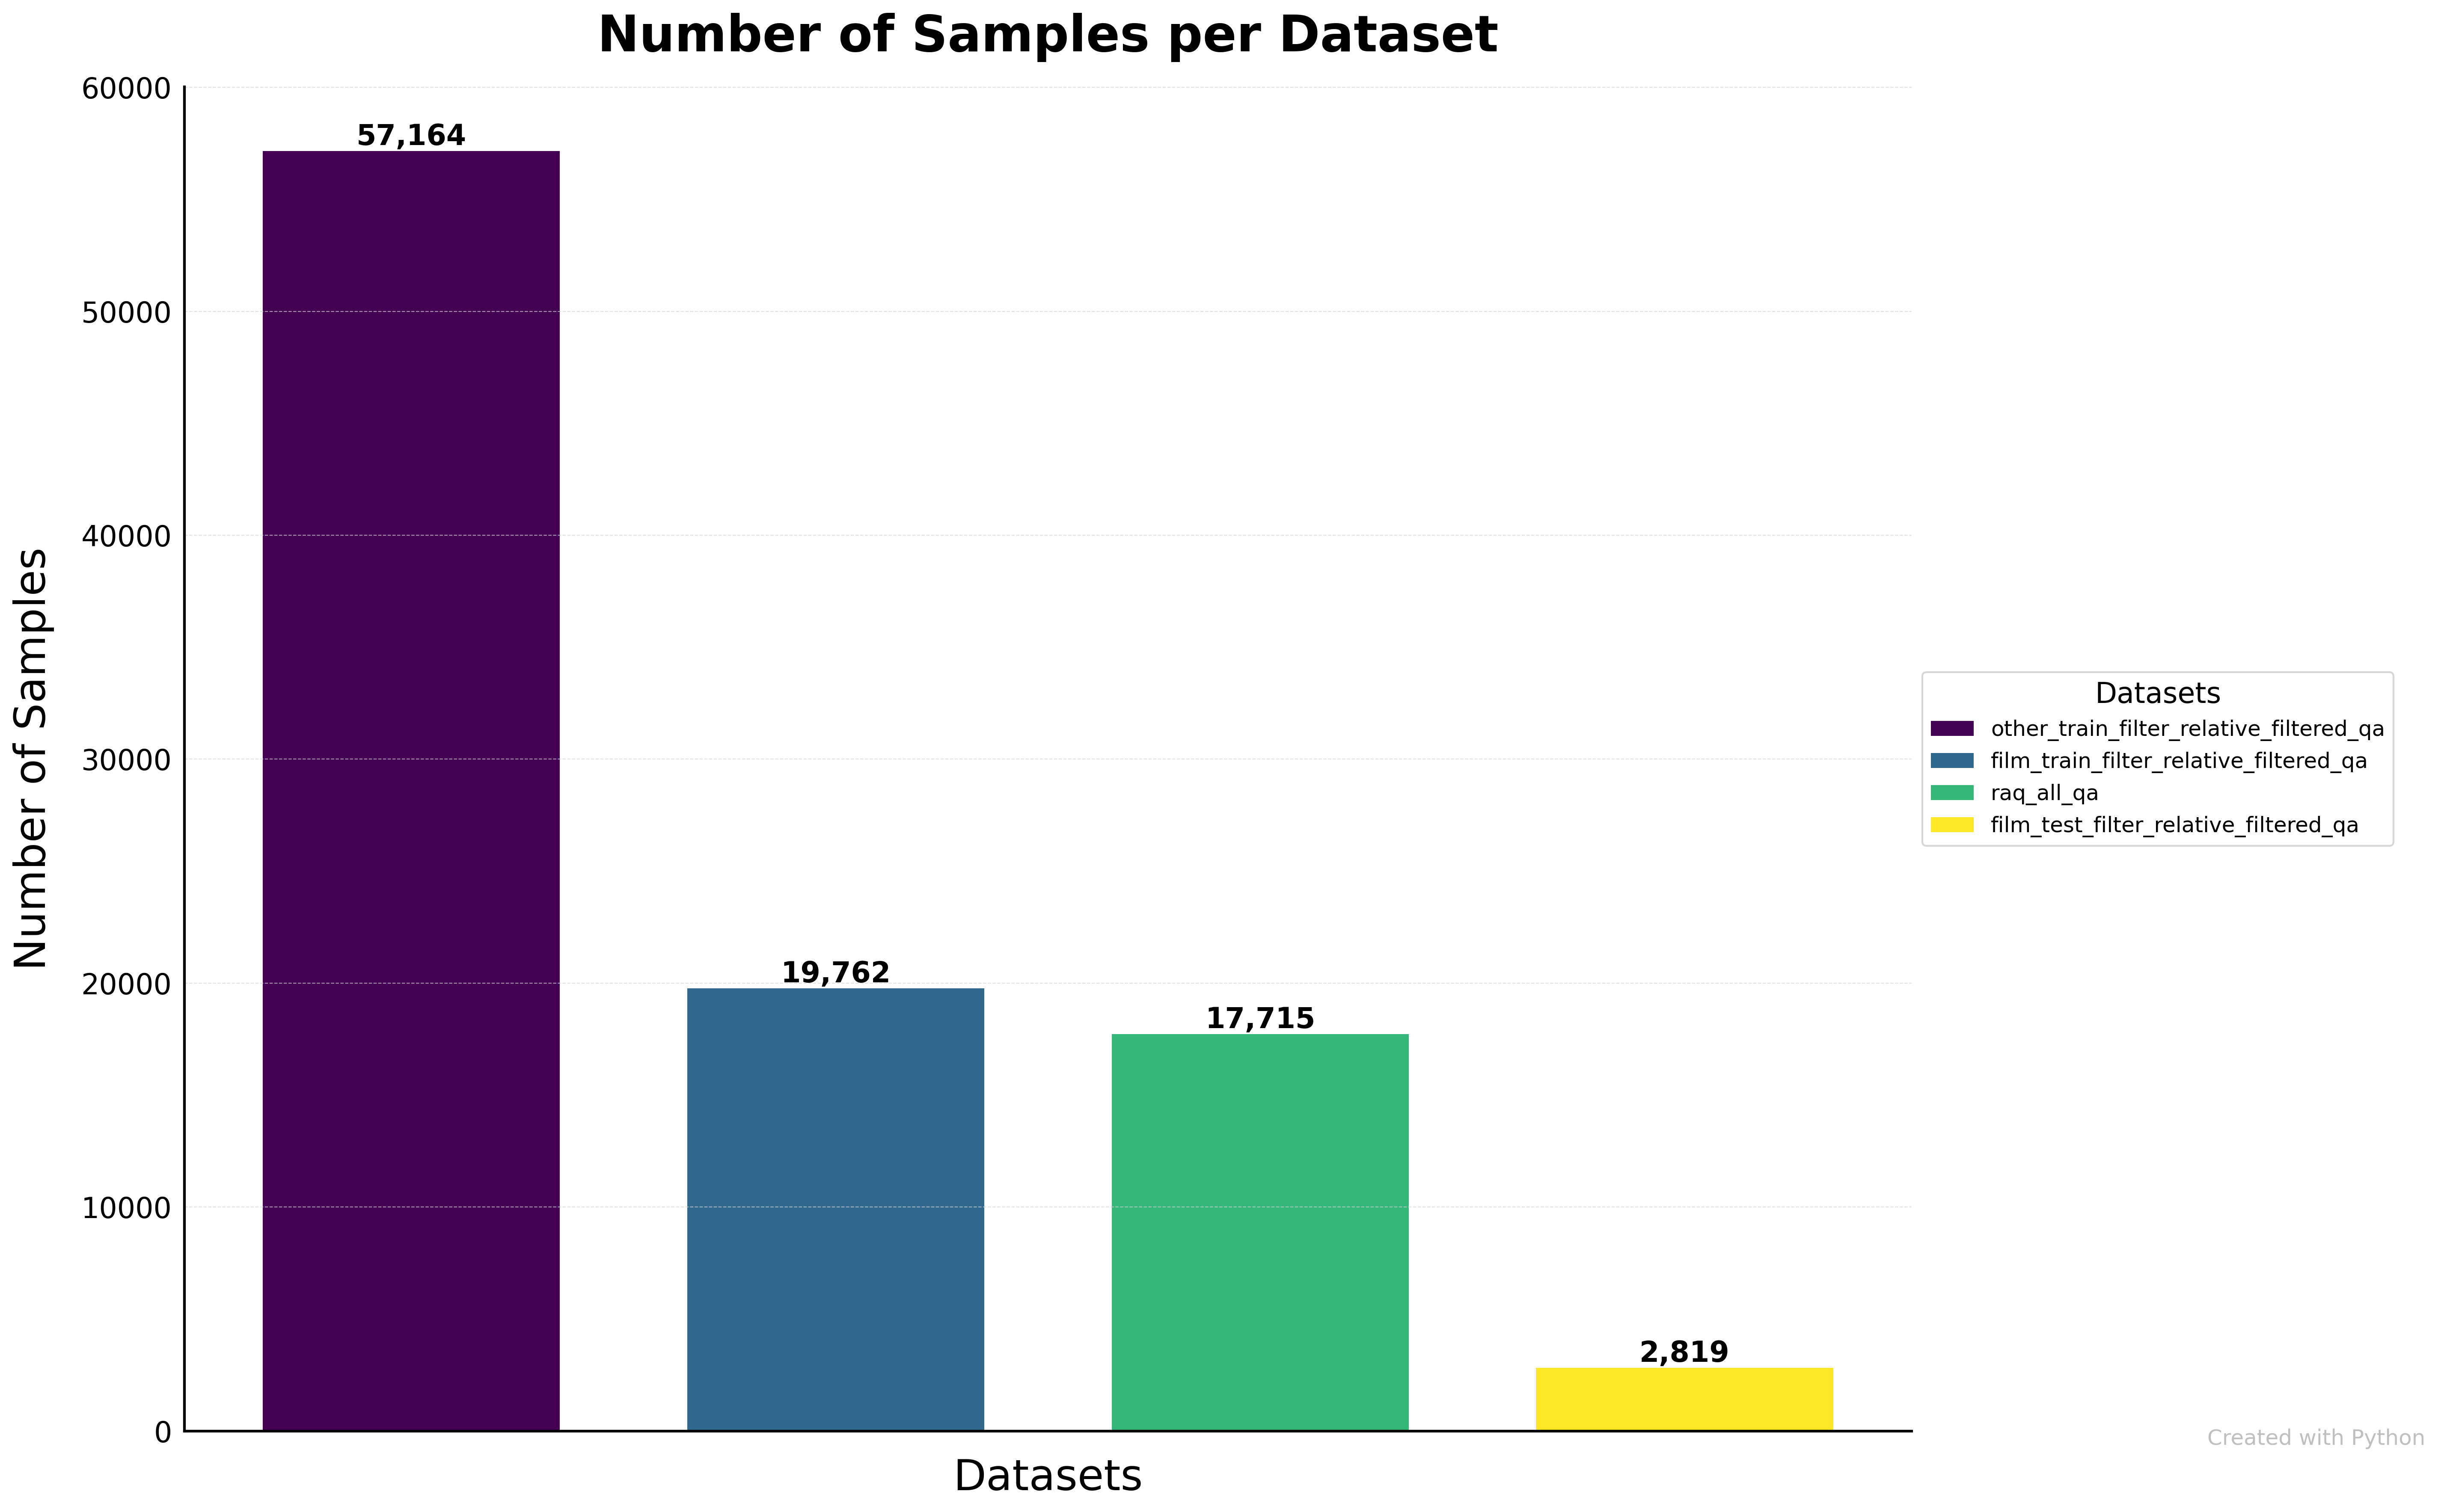

In [12]:
import glob
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# Set up basic plot style
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 14,
    'axes.labelsize': 20,
    'axes.titlesize': 24,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.5,
    'lines.linewidth': 2,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
})

CLEAN_PATH = '../data/PIT-RAQ-Drive/clean'

# Get all JSONL files in the directory
files = glob.glob(f"{CLEAN_PATH}/*.jsonl")

# Extract dataset names and count samples
datasets = []
for file in files:
    df = pl.read_ndjson(file)
    dataset_name = file.split("/")[-1].split(".")[0]
    datasets.append({"name": dataset_name, "samples": len(df)})

# Sort datasets by number of samples (descending order)
datasets.sort(key=lambda x: x["samples"], reverse=True)

# Prepare data for plotting
names = [d["name"] for d in datasets]
samples = [d["samples"] for d in datasets]

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 12), dpi=300)

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

# Create the bar plot
bars = ax.bar(range(len(datasets)), samples, width=0.7, color=colors)

# Customize the plot
ax.set_title("Number of Samples per Dataset", fontsize=28, fontweight='bold', pad=20)
ax.set_xlabel("Datasets", fontsize=24, labelpad=15)
ax.set_ylabel("Number of Samples", fontsize=24, labelpad=15)
ax.set_xticks([])  # Remove x-axis ticks

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}',
            ha='center', va='bottom', fontsize=16, fontweight='bold')

# Improve the layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False)

# Add gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='none') for color in colors]
ax.legend(legend_elements, names, loc='center left', bbox_to_anchor=(1, 0.5), 
          title="Datasets", fontsize=12, title_fontsize=16)

# Add a watermark-style text
fig.text(0.95, 0.05, 'Created with Python', fontsize=12, color='gray', ha='right', va='bottom', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.subplots_adjust(right=0.75)

# Display the plot
plt.show()

/tmp/ipykernel_3140167/1848822098.py:17: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  lengths = df[question_col].map_elements(len).drop_nulls()
/tmp/ipykernel_3140167/1848822098.py:26: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  lengths = df[answer_col].map_elements(len).drop_nulls()


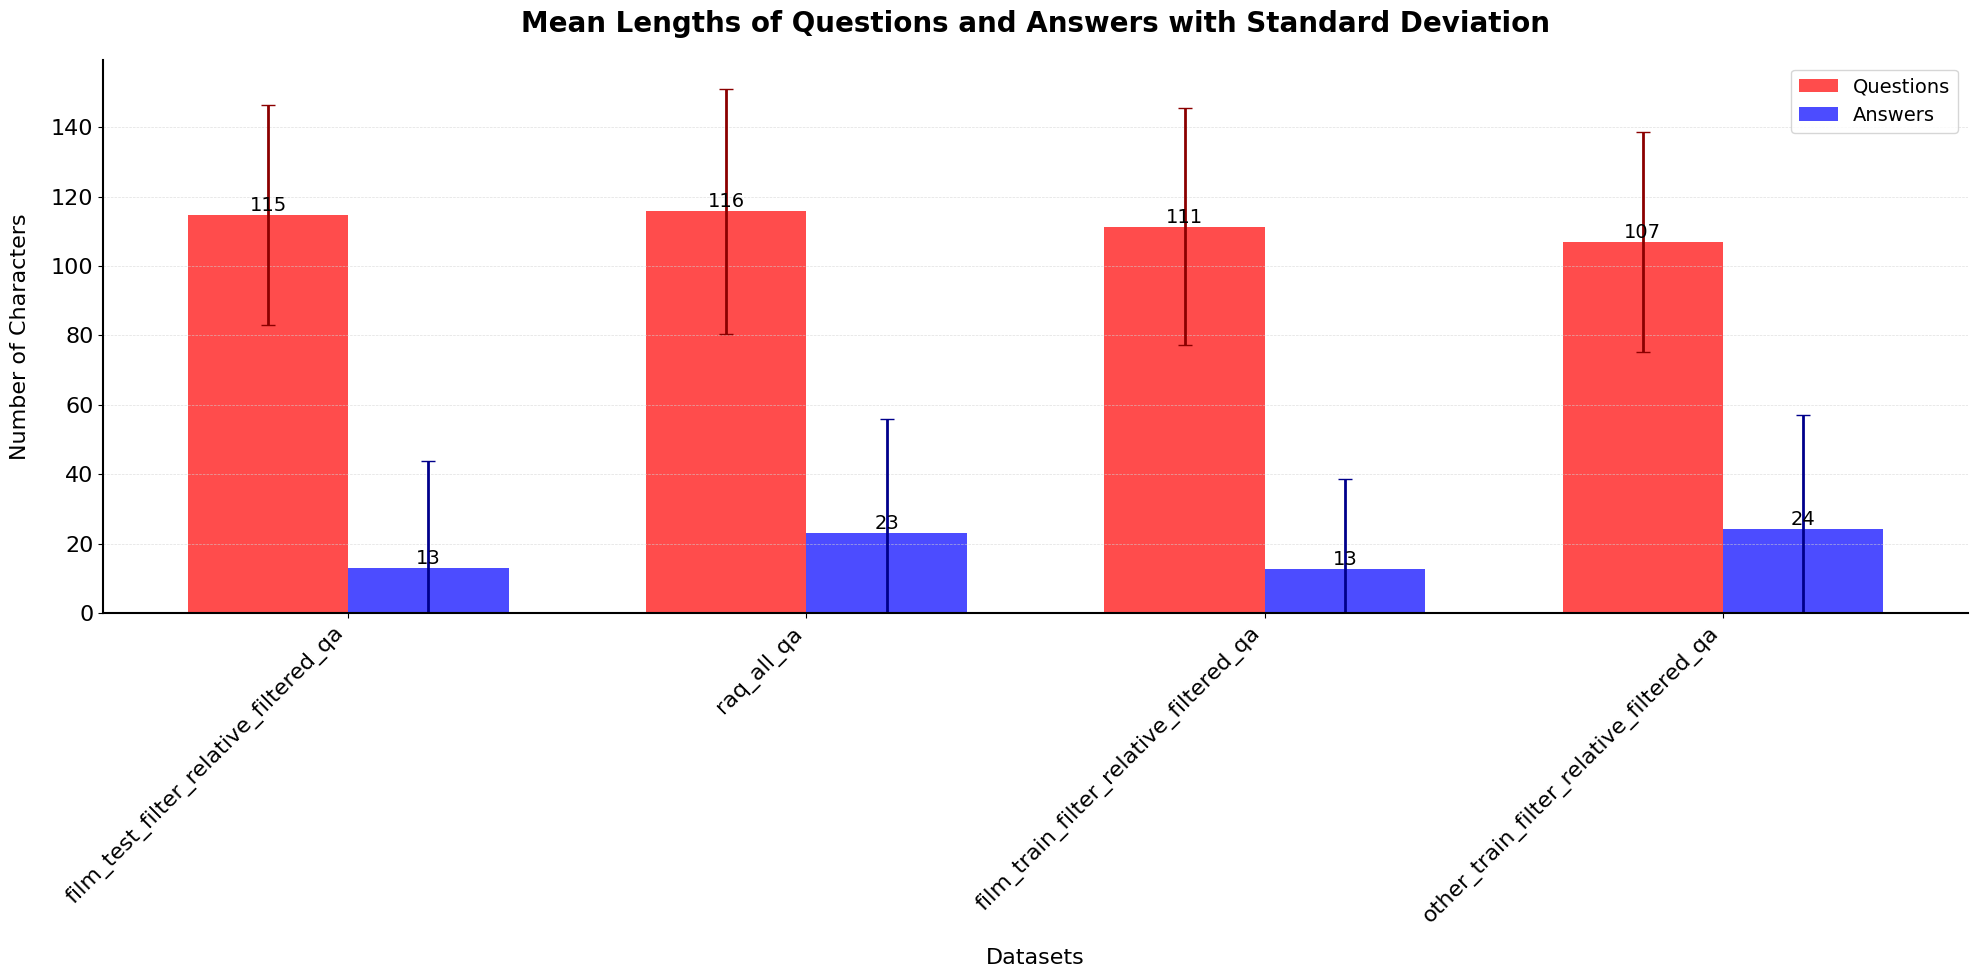

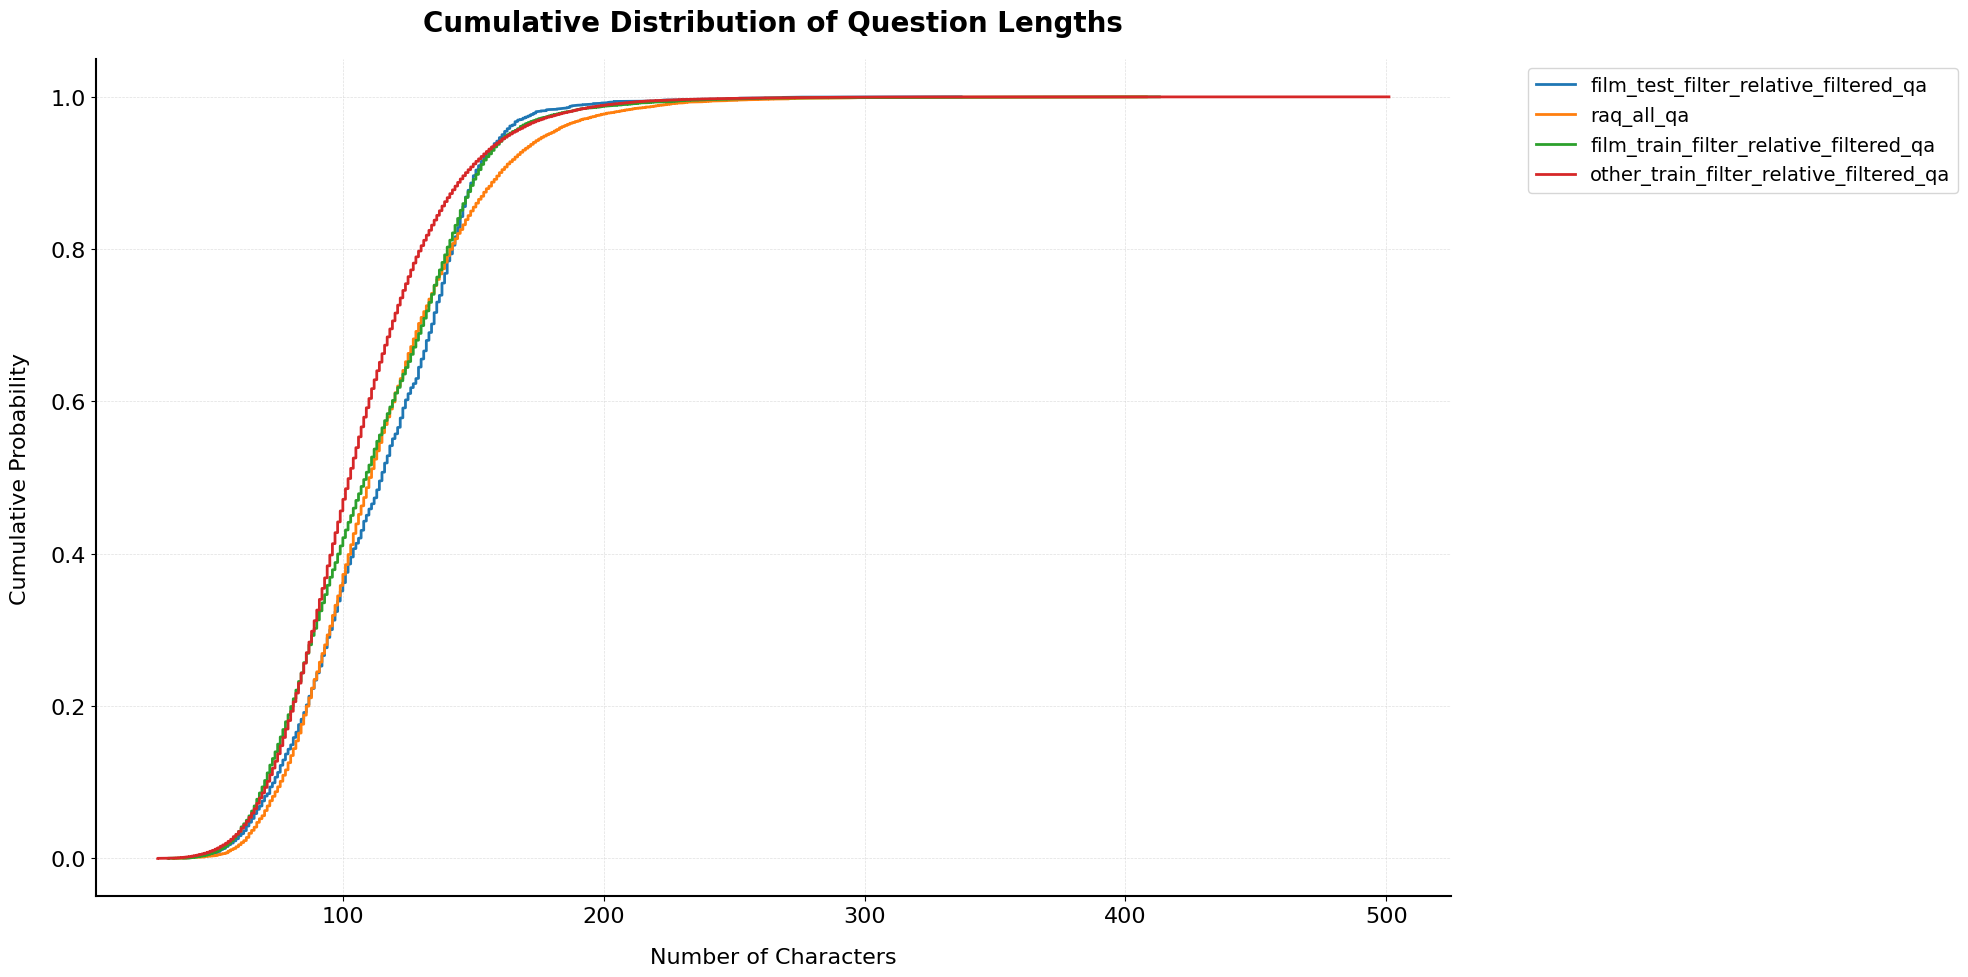

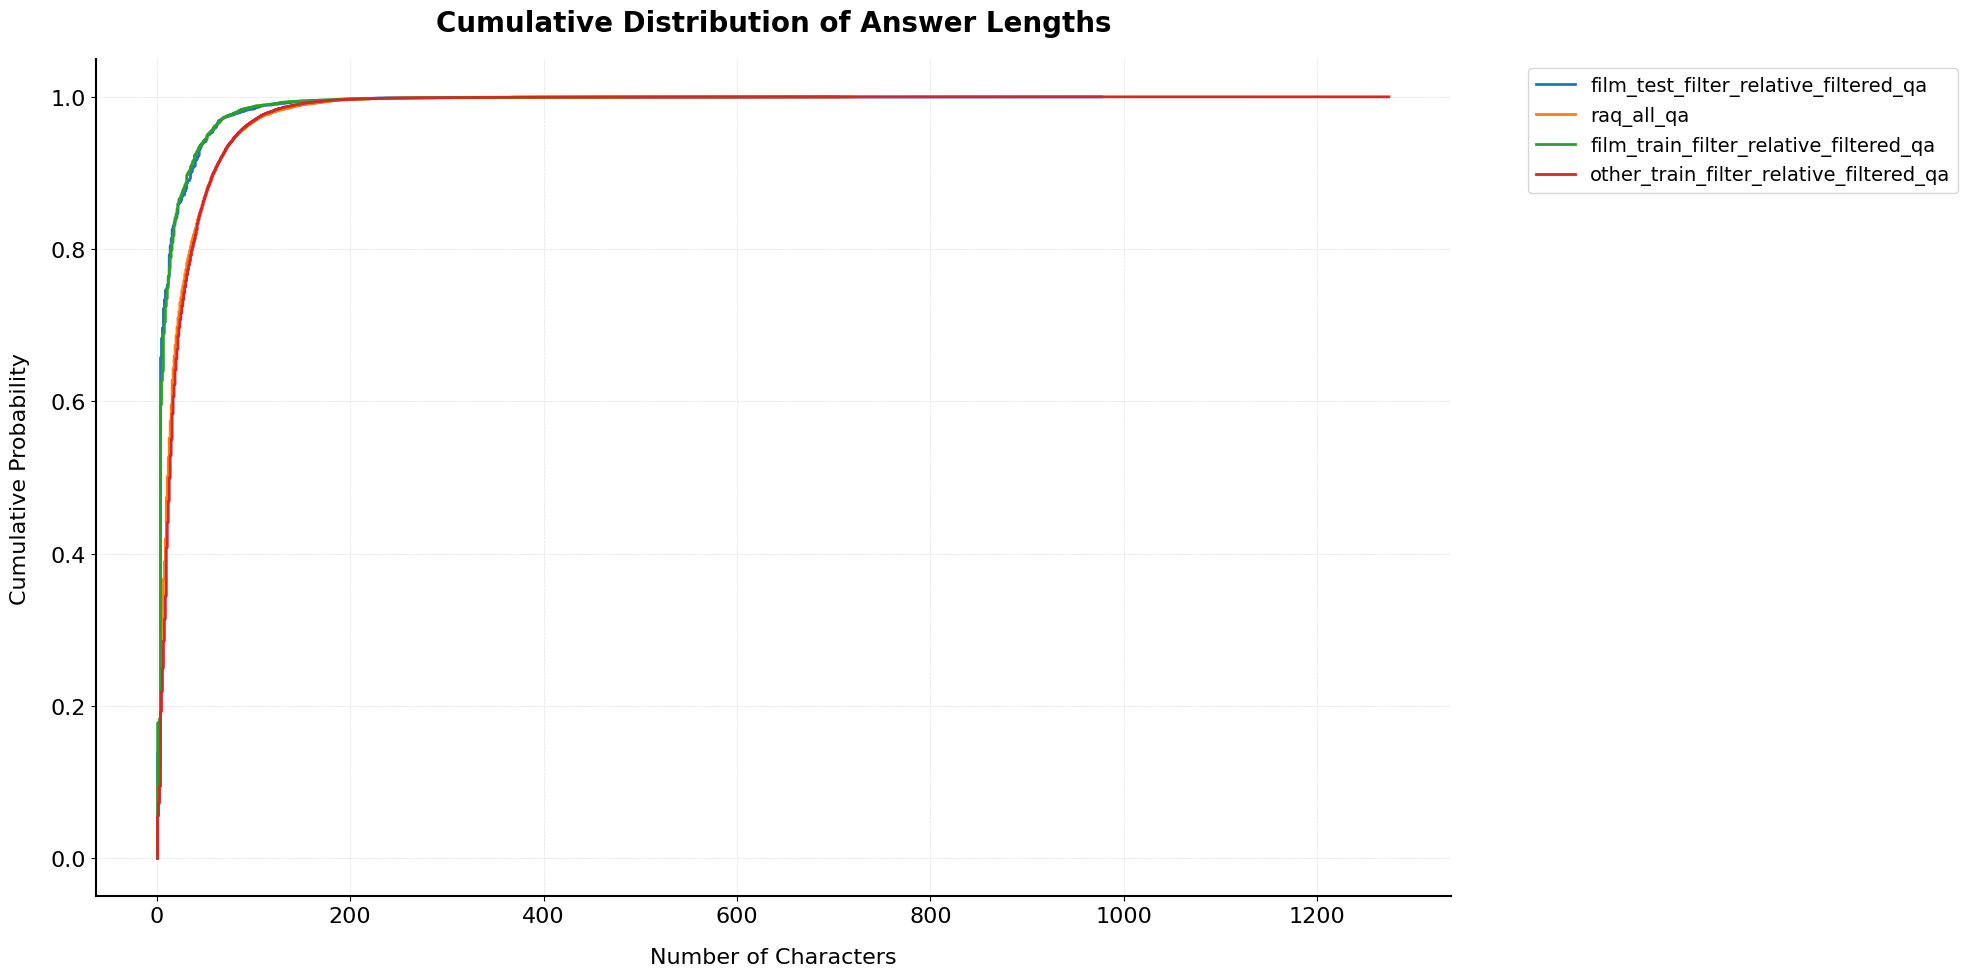

In [18]:
CLEAN_PATH = '../data/PIT-RAQ-Drive/clean'

# Get all JSONL files in the directory
files = glob.glob(f"{CLEAN_PATH}/*.jsonl")

# Process each dataset
datasets = []
for file in files:
    df = pl.read_ndjson(file)
    dataset_name = file.split("/")[-1].split(".")[0]
    
    dataset_info = {'name': dataset_name}
    
    # Calculate statistics for 'question' column or alternative
    question_col = next((col for col in df.columns if 'question' in col.lower()), None)
    if question_col:
        lengths = df[question_col].map_elements(len).drop_nulls()
        dataset_info['question_mean'] = lengths.mean()
        dataset_info['question_median'] = lengths.median()
        dataset_info['question_std'] = lengths.std()
        dataset_info['question_lengths'] = lengths.to_list()
    
    # Calculate statistics for 'answer' column or alternative
    answer_col = next((col for col in df.columns if 'answer' in col.lower() or 'response' in col.lower()), None)
    if answer_col:
        lengths = df[answer_col].map_elements(len).drop_nulls()
        dataset_info['answer_mean'] = lengths.mean()
        dataset_info['answer_median'] = lengths.median()
        dataset_info['answer_std'] = lengths.std()
        dataset_info['answer_lengths'] = lengths.to_list()
    
    datasets.append(dataset_info)

# Sort datasets by question median length (descending order), if available
datasets.sort(key=lambda x: x.get('question_median', 0), reverse=True)

# Prepare data for plotting
names = [d['name'] for d in datasets]
question_means = [d.get('question_mean', 0) for d in datasets]
question_stds = [d.get('question_std', 0) for d in datasets]
answer_means = [d.get('answer_mean', 0) for d in datasets]
answer_stds = [d.get('answer_std', 0) for d in datasets]

# Plot 1: Mean lengths with standard deviation
plt.figure(figsize=(20, 10))
width = 0.35
x = np.arange(len(names))

# Create the main bars
bars1 = plt.bar(x - width/2, question_means, width, label='Questions', color='red', alpha=0.7)
bars2 = plt.bar(x + width/2, answer_means, width, label='Answers', color='blue', alpha=0.7)

# Add error bars for standard deviation
plt.errorbar(x - width/2, question_means, yerr=question_stds, fmt='none', ecolor='darkred', capsize=5)
plt.errorbar(x + width/2, answer_means, yerr=answer_stds, fmt='none', ecolor='darkblue', capsize=5)

# Customize the plot
plt.title("Mean Lengths of Questions and Answers with Standard Deviation", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Datasets", fontsize=16, labelpad=15)
plt.ylabel("Number of Characters", fontsize=16, labelpad=15)
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()

# Add value labels on top of each bar
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}', ha='center', va='bottom')

# Improve the layout
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

plt.tight_layout()
plt.show()

# Plot 2: Cumulative Distribution Function for Questions
plt.figure(figsize=(20, 10))
for dataset in datasets:
    if 'question_lengths' in dataset:
        x = np.sort(dataset['question_lengths'])
        y = np.arange(1, len(x)+1) / len(x)
        plt.plot(x, y, label=dataset['name'])

plt.title("Cumulative Distribution of Question Lengths", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Characters", fontsize=16, labelpad=15)
plt.ylabel("Cumulative Probability", fontsize=16, labelpad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Plot 3: Cumulative Distribution Function for Answers
plt.figure(figsize=(20, 10))
for dataset in datasets:
    if 'answer_lengths' in dataset:
        x = np.sort(dataset['answer_lengths'])
        y = np.arange(1, len(x)+1) / len(x)
        plt.plot(x, y, label=dataset['name'])

plt.title("Cumulative Distribution of Answer Lengths", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Characters", fontsize=16, labelpad=15)
plt.ylabel("Cumulative Probability", fontsize=16, labelpad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [23]:
import glob
import polars as pl
import numpy as np
import textwrap

CLEAN_PATH = '../data/PIT-RAQ-Drive/clean'

def get_outliers(lengths, qa_pairs, n=5):
    q1 = np.percentile(lengths, 25)
    q3 = np.percentile(lengths, 75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    outliers = [(length, qa) for length, qa in zip(lengths, qa_pairs) if length > upper_bound]
    return sorted(outliers, reverse=True)[:n]

def wrap_text(text, width=100):
    return '\n      '.join(textwrap.wrap(text, width=width))

# Get all JSONL files in the directory
files = glob.glob(f"{CLEAN_PATH}/*.jsonl")

for file in files:
    df = pl.read_ndjson(file)
    dataset_name = file.split("/")[-1].split(".")[0]
    
    print(f"\nDataset: {dataset_name}")
    
    # Find question and answer columns
    question_col = next((col for col in df.columns if 'question' in col.lower()), None)
    answer_col = next((col for col in df.columns if 'answer' in col.lower() or 'response' in col.lower()), None)
    
    if question_col and answer_col:
        questions = df[question_col].to_list()
        answers = df[answer_col].to_list()
        qa_pairs = list(zip(questions, answers))
        lengths = [len(a) for a in answers]
        outliers = get_outliers(lengths, qa_pairs)
        
        print("\nTop 5 longest answers with their questions:")
        for i, (length, (question, answer)) in enumerate(outliers, 1):
            print(f"{i}. Answer Length: {length}")
            print(f"   Question: {wrap_text(question)}")
            print(f"   Answer: {wrap_text(answer)}")
            print("-" * 100)  # Separator between QA pairs
    else:
        print("Could not find both question and answer columns in this dataset.")
    
    print("\n" + "="*100)  # Separator between datasets


Dataset: raq_all_qa

Top 5 longest answers with their questions:
1. Answer Length: 718
   Question: What is the commonality among the professions of the individuals who became the Overwatch characters
      Widowmaker, Mercy, and D.Va prior to joining their respective organizations?
   Answer: They were all involved in the arts or performance, with Widowmaker being a ballerina, Mercy being a
      doctor who also provided medical support to the original Overwatch group but not directly related to
      arts, however D.Va was a pro-eSports gamer, and Mercy was also incorrect but the commonality among
      the professions of Widowmaker and D.Va and not Mercy is that they were both involved in the arts or
      performance, however Tracer was not a part of this question but it would have also fit in this
      category as she was not but the commonality is that Widowmaker was a ballerina and D.Va was a gamer
      which is also a form of performance, and a commonality between the two is

In [28]:
import glob
import polars as pl
import numpy as np
import os

CLEAN_PATH = '../data/PIT-RAQ-Drive/clean'
OUTPUT_PATH = '../data/PIT-RAQ-Drive/clean'

def filter_long_answers(df, question_col, answer_col):
    # Calculate lengths of answers
    answer_lengths = df[answer_col].map_elements(len, return_dtype=int)
    
    # Calculate mean and standard deviation
    mean_length = answer_lengths.mean()
    std_length = answer_lengths.std()
    
    # Set threshold
    threshold = mean_length + 2 * std_length
    
    # Filter the dataframe
    filtered_df = df.filter(answer_lengths <= threshold)
    
    # Calculate how many entries were removed
    removed_count = len(df) - len(filtered_df)
    
    return filtered_df, removed_count, threshold

# Ensure output directory exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Get all JSONL files in the directory
files = glob.glob(f"{CLEAN_PATH}/*.jsonl")

for file in files:
    df = pl.read_ndjson(file)
    dataset_name = file.split("/")[-1].split(".")[0]
    
    print(f"\nDataset: {dataset_name}")
    
    # Find question and answer columns
    question_col = next((col for col in df.columns if 'question' in col.lower()), None)
    answer_col = next((col for col in df.columns if 'answer' in col.lower() or 'response' in col.lower()), None)
    
    if question_col and answer_col:
        # Apply the filter
        filtered_df, removed_count, threshold = filter_long_answers(df, question_col, answer_col)
        
        # Print results
        print(f"Original dataset size: {len(df)}")
        print(f"Filtered dataset size: {len(filtered_df)}")
        print(f"Number of entries removed: {removed_count}")
        print(f"Threshold used (mean + 2 std dev): {threshold:.2f} characters")
        
        # Calculate and print percentiles for the original and filtered datasets
        original_lengths = df[answer_col].map_elements(len, return_dtype=int)
        filtered_lengths = filtered_df[answer_col].map_elements(len, return_dtype=int)
        
        percentiles = [25, 50, 75, 90, 95, 99]
        print("\nPercentiles of answer lengths:")
        print(f"{'Percentile':>10} {'Original':>12} {'Filtered':>12}")
        print("-" * 36)
        for p in percentiles:
            original_p = np.percentile(original_lengths, p)
            filtered_p = np.percentile(filtered_lengths, p)
            print(f"{p:>10}th {original_p:>12.2f} {filtered_p:>12.2f}")
        
        # Save the filtered dataset
        output_file = os.path.join(OUTPUT_PATH, f"length_filtered_{dataset_name}.jsonl")
        filtered_df.write_ndjson(output_file)
        print(f"\nFiltered dataset saved as: {output_file}")
    else:
        print("Could not find both question and answer columns in this dataset.")
    
    print("\n" + "="*50)

print("\nAll datasets have been processed and filtered versions have been saved.")


Dataset: raq_all_qa
Original dataset size: 17715
Filtered dataset size: 16954
Number of entries removed: 761
Threshold used (mean + 2 std dev): 89.05 characters

Percentiles of answer lengths:
Percentile     Original     Filtered
------------------------------------
        25th         4.00         4.00
        50th        11.00        11.00
        75th        27.00        23.00
        90th        59.00        48.00
        95th        84.00        63.00
        99th       153.86        81.00

Filtered dataset saved as: ../data/PIT-RAQ-Drive/clean/length_filtered_raq_all_qa.jsonl


Dataset: film_train_filter_relative_filtered_qa
Original dataset size: 19762
Filtered dataset size: 19095
Number of entries removed: 667
Threshold used (mean + 2 std dev): 64.33 characters

Percentiles of answer lengths:
Percentile     Original     Filtered
------------------------------------
        25th         4.00         4.00
        50th         4.00         4.00
        75th        12.00         